# Build an XGBoost model

### Introduction

This activity is a continuation of the airlines project in which we have built decision tree and random forest models. We will use the same data, but this time, train, tune, and evaluate an XGBoost model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import plot_importance

import pickle

### Load and inspect the dataset

To formulate the model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`.

In [3]:
airline_data= pd.read_csv(r'C:\Users\user\Desktop\Course 5\Invistico_Airline.csv')

In [4]:
airline_data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
airline_data.shape

(129880, 22)

### Display the data type for each column

Next, observe the types of data present within this dataset.

In [12]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [13]:
airline_data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Model preparation

**NOTE:**
- As this is a binary classfication problem, it will be important to evaluate not just accuracy, but the balance of false positives and false negatives that the model's predictions provide. Therefore, precision, recall, and ultimately the F1 score will be excellent metrics to use.
- The ROC AUC (Area Under the Receiver Operating Characteristic) score is also suited to this type of modeling.

In [14]:
# Convert the object predictor variables to numerical dummies.
airline_data_dummies = pd.get_dummies(airline_data, 
                                         columns=['satisfaction','Customer Type','Type of Travel','Class'])

In [16]:
airline_data_dummies.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0.0,0,1,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,305.0,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,0,1,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,0.0,0,1,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,0.0,0,1,1,0,0,1,0,1,0


In [17]:
# Define the y (target) variable.
y = airline_data_dummies['satisfaction_satisfied']

# Define the X (predictor) variables.
X = airline_data_dummies.drop(['satisfaction_satisfied','satisfaction_dissatisfied'], axis = 1)

In [18]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### "Instantiate" the XGBClassifer

Before fitting the model to our airline dataset, first create the XGB Classifier model and define its objective. We'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [19]:
# Define xgb to be your XGBClassifier.
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [20]:
# Define the parameters for tuning and assign it to a variable called cv_params
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

**NOTE:**
- More estimators will initially improve the model's performance. However, increasing the number of estimators will also considerably increase the time spent during the GridSearch process, and there will be diminishing returns as the number of estimators continues to increase.

In [21]:
# Define the criteria for evaluating the hyperparameter tuning
scoring= {'accuracy', 'recall', 'precision', 'f1'}

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics defined above. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [22]:
# Construct the gridsearch
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [23]:
%%time
# fit the GridSearch model to training data
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: total: 7min 13s
Wall time: 4min 29s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring={'f1', 'recall', 'precision', 'accuracy'})

### Save your model for reference using `pickle`

Use the `pickle` library we've already imported to save the output of this model.

In [26]:
with open ('xgb2_cv.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

## Results and evaluation

First, use your trained model to formulate predictions on your test set.

In [27]:
# Apply your model to predict on your test data. Call this output "y_pred".
y_pred = xgb_cv.predict(X_test)

### Leverage metrics to evaluate the model's performance

Specifically, print the accuracy score, precision score, recall score, and f1 score associated with the test data and predicted values.

In [28]:
# Print your accuracy score.
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# Print your precision score.
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# Print your recall score.
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# Print your f1 score.
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9296889436402833
precision score: 0.9413165504337473
recall score: 0.9300840336134454
f1 score: 0.9356665821286668


### Quick Insight
The accuracy score for this model is 0.939, or 93.9% accurate.

In classification problems, accuracy is useful to know but may not be the best metric to evaluate this model.


Precision and recall scores are both useful to evaluate the correct predictive capability of the model because they balance the false positives and false negatives inherent in prediction. The model shows a precision score of 0.948, suggesting the model is very good at predicting true positives. This means the model correctly predicts whether the airline passenger will be satisfied. The recall score of 0.940 is also very good. This means that the model does a good job of correctly identifying dissatisfied passengers within the dataset. These two metrics combined give a better assessment of model performance than the accuracy metric does alone.


### Gain clarity with the confusion matrix

Create a confusion matrix based on the predicted values for the test set.

CPU times: total: 219 ms
Wall time: 530 ms


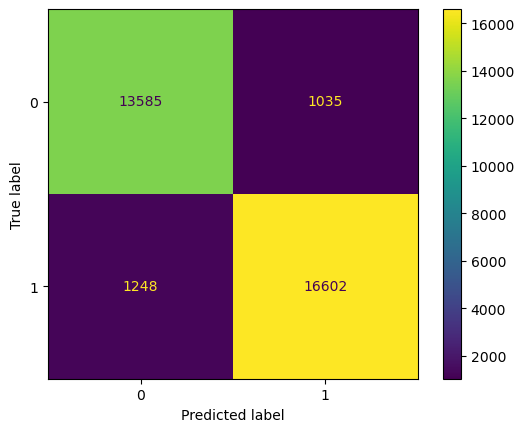

In [29]:
%%time
# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot the visual in-line.
disp.plot()

### Quick Insight
The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.

Additionally, the concentration of true positives and true negatives stands out relative to false positives and false negatives, respectively. This ratio is why the precision score is so high (0.944).

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of our model.

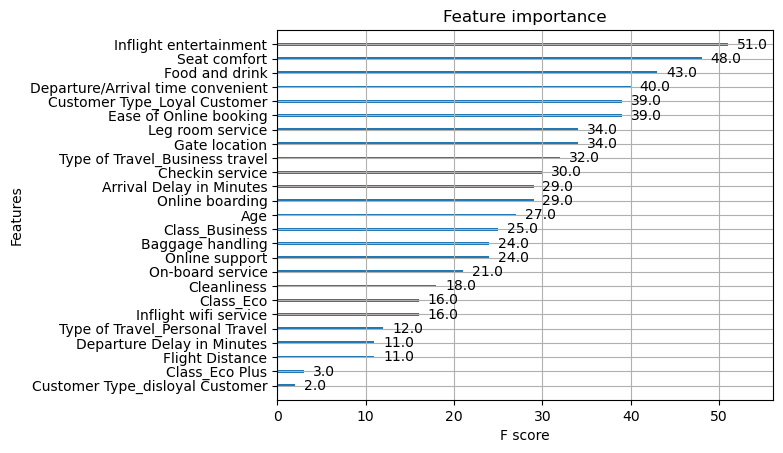

In [31]:
# Plot the relative feature importance of the predictor variables in your model.
plot_importance(xgb_cv.best_estimator_);

### Quick Insight
- Inflight entartainment rated as most important in the model. However, the perks of being in first class also go beyond the entartainment, so perhaps that is an underlying explanation of this feature's importance.
- Surprisingly, delays (both arrival and departure) did not score as highly important.



In [37]:
# Create a table of results to compare model performance.
table = pd.DataFrame()
table = table.append({'Model': "Tuned Decision Tree",
                        'F1':  0.945422,
                        'Recall': 0.935863,
                        'Precision': 0.955197,
                        'Accuracy': 0.940864
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Tuned Random Forest",
                        'F1':  0.947306,
                        'Recall': 0.944501,
                        'Precision': 0.950128,
                        'Accuracy': 0.942450
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Tuned XGBoost",
                        'F1':  f1_score,
                        'Recall': rc_score,
                        'Precision': pc_score,
                        'Accuracy': ac_score
                      },
                        ignore_index=True
                    )

table

C:\Users\user\AppData\Local\Temp\ipykernel_11360\1763212040.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': "Tuned Decision Tree",
C:\Users\user\AppData\Local\Temp\ipykernel_11360\1763212040.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': "Tuned Random Forest",
C:\Users\user\AppData\Local\Temp\ipykernel_11360\1763212040.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': "Tuned XGBoost",


,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450
2,Tuned XGBoost,0.935667,0.930084,0.941317,0.929689


### Quick Insight
Based on the results shown in the table above, the F1, precision, recall, and accuracy scores of the XGBoost model are similar to the corresponding scores of the decision tree and random forest models. The random forest model seemed to outperform the decision tree model as well as the XGBoost model. This could be because we didn't use as much estimators for the XGBoost model as we did for the Random Forest.

## Conclusions

**What I will share with my team during the next meeting**
- Showcase the data used to create the prediction and the performance of the model overall.
- Review the sample output of the features and the confusion matrix to reference the model's performance.
- Highlight the metric values, emphasizing the F1 score.
- Visualize the feature importance to showcase what drove the model's predictions.

**My findings to stakeholders**
- The model created is highly effective at predicting passenger satisfaction.
- The feature importance of seat comfort warrants additional investigation. It will be important to ask domain experts why they believe this feature scores so highly in this model.